In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **1.Reading the Data**
##### Using a dataset with data extracted from [Fragrantica](https://www.fragrantica.com)

*Data until 2024* | **Source of the data**: Kaggle platform  


In [2]:
#Reading data from a .csv file in the same directory
fragrance_df = pd.read_csv("../data/fragrance_database.csv", sep=";", encoding="latin1")


In [3]:
fragrance_df.head()

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento-overdose-pride-edition,xerjoff,Italy,unisex,"1,42",201,2022.0,"fruity notes, aldehydes, green notes","bulgarian rose, egyptian jasmine, lily-of-the-...","eucalyptus, pine",unknown,NaN,rose,woody,fruity,aromatic,floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2024,jean-paul-gaultier,France,women,"1,86",70,2024.0,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",unknown,NaN,citrus,white floral,sweet,fresh,musky
2,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2023,jean-paul-gaultier,France,unisex,"1,91",285,2023.0,"blood orange, yuzu","neroli, orange blossom","musk, white woods",natalie gracia-cetto,quentin bisch,citrus,white floral,sweet,fresh spicy,musky
3,https://www.fragrantica.com/perfume/bruno-bana...,pride-edition-man,bruno-banani,Germany,men,"1,92",59,2019.0,"guarana, grapefruit, red apple","walnut, lavender, guava","vetiver, benzoin, amber",unknown,NaN,fruity,nutty,woody,tropical,NaN
4,https://www.fragrantica.com/perfume/jean-paul-...,le-male-pride-collector,jean-paul-gaultier,France,men,"1,93",632,2020.0,"mint, lavender, cardamom, artemisia, bergamot","caraway, cinnamon, orange blossom","vanilla, sandalwood, amber, cedar, tonka bean",francis kurkdjian,NaN,aromatic,warm spicy,fresh spicy,cinnamon,vanilla


In [4]:
#Shape and format of the dataframe obtain from webscrapping
print(fragrance_df.shape)
print("Number of rows:", fragrance_df.shape[0]) # Number of rows
print("Number of columns:", fragrance_df.shape[1]) # Number of columns

(24063, 18)
Number of rows: 24063
Number of columns: 18


In [5]:
# Count the unique values in each column
nunique_values = fragrance_df.nunique()
print(nunique_values)

url             24063
Perfume         22840
Brand            1060
Country            54
Gender              3
Rating Value      221
Rating Count     2721
Year              145
Top             18771
Middle          19690
Base            16393
Perfumer1         869
Perfumer2         259
mainaccord1        66
mainaccord2        71
mainaccord3        72
mainaccord4        69
mainaccord5        77
dtype: int64


### **2. Cleaning Data**

1. **Check for missing values:** Identify missing data and handle them.
2. **Check for duplicates:** Remove duplicated values.
3. **Normalize text data:** Standardize text format (convert to lowercase, remove extra spaces).
4. **Convert data types:** Ensure numerical columns are in the correct format.



Step 2.1

In [6]:
#1.Count the number of null values in each column before handling
print("Number of null values in each column before handling:")
print(fragrance_df.isna().sum())

Number of null values in each column before handling:
url                 0
Perfume             0
Brand               0
Country             0
Gender              0
Rating Value        0
Rating Count        0
Year             2037
Top                 0
Middle              0
Base                0
Perfumer1           0
Perfumer2       22727
mainaccord1         0
mainaccord2        13
mainaccord3       114
mainaccord4       388
mainaccord5       981
dtype: int64


In [7]:
#Handling 'year' missing values, filling with 'year column' with 0
fragrance_df["Year"] = fragrance_df["Year"].fillna(0)

In [8]:
#Handling 'perfumer2' missing values, filling with 'perfumer2 column' with 'Unknown'
fragrance_df["Perfumer2"] = fragrance_df["Perfumer2"].fillna("Unknown")

In [9]:
#Handling 'mainaccord2', 'mainaccord3', 'mainaccord4', 'mainaccord5' missing values, filling these columns with 'Unknown'
fragrance_df["mainaccord2"] = fragrance_df["mainaccord2"].fillna("Unknown")
fragrance_df["mainaccord3"] = fragrance_df["mainaccord3"].fillna("Unknown")
fragrance_df["mainaccord4"] = fragrance_df["mainaccord4"].fillna("Unknown")
fragrance_df["mainaccord5"] = fragrance_df["mainaccord5"].fillna("Unknown")

In [10]:
#1.Check after treatment null values in each column
print("Number of null values in each column after handling:")
print(fragrance_df.isna().sum())

Number of null values in each column after handling:
url             0
Perfume         0
Brand           0
Country         0
Gender          0
Rating Value    0
Rating Count    0
Year            0
Top             0
Middle          0
Base            0
Perfumer1       0
Perfumer2       0
mainaccord1     0
mainaccord2     0
mainaccord3     0
mainaccord4     0
mainaccord5     0
dtype: int64


Step 2.2

In [11]:
# Count the number of duplicate rows
number_of_duplicates = fragrance_df.duplicated().sum()
print(f"Number of duplicated rows: {number_of_duplicates}")

Number of duplicated rows: 0


In [12]:
#Check if there are some duplicated rows in the dataframe, just some small differences in some of the columns but same perfume
duplicates = fragrance_df.groupby(["Brand", "Perfume", "Gender", "Year"]).filter(lambda x: len(x) > 1)

#Organise to visualize
duplicates = duplicates.sort_values(by=["Brand", "Perfume"])

#Visualize
duplicates

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
3868,https://www.fragrantica.com/perfume/bugatti-fa...,bugatti-dynamic-move-amber,bugatti-fashion,Germany,men,"3,7",46,2023.0,"aromatic notes, lemon, nutmeg","aquatic notes, lavender, aldehydes","amber, musk, patchouli, licorice",unknown,Unknown,amber,musky,aromatic,aldehydic,lavender
19315,https://www.fragrantica.com/perfume/bugatti-fa...,bugatti-dynamic-move-amber,bugatti-fashion,Germany,men,"4,19",101,2023.0,"cinnamon, aromatic notes","violet, cypriol oil or nagarmotha","cedar, tobacco",unknown,Unknown,woody,cinnamon,warm spicy,tobacco,powdery
15027,https://www.fragrantica.com/perfume/caron/fleu...,fleurs-de-rocaille,caron,France,women,"4,05",522,1934.0,"aldehydes, tincture of rose, lilac, jasmine","carnation, ylang-ylang, lily-of-the-valley, vi...","oak moss, sandalwood, musk, virginia cedar",ernest daltroff,Unknown,floral,fresh,woody,white floral,aldehydic
21981,https://www.fragrantica.com/perfume/caron/fleu...,fleurs-de-rocaille,caron,France,women,"4,32",158,1934.0,"lilac, aldehydes, rose, jasmine","ylang-ylang, lily-of-the-valley, violet, cloves","musk, oakmoss, sandalwood, virginian cedar",ernest daltroff,Unknown,floral,fresh,white floral,woody,powdery
810,https://www.fragrantica.com/perfume/commodity/...,book,commodity,USA,unisex,"3,44",185,2021.0,"sandalwood, cedar","black tea, musk",musk,unknown,Unknown,woody,powdery,warm spicy,Unknown,Unknown
1180,https://www.fragrantica.com/perfume/commodity/...,book,commodity,USA,unisex,"3,5",254,2021.0,"sandalwood, cedar","black tea, musk",musk,unknown,Unknown,woody,powdery,musky,green,warm spicy
1580,https://www.fragrantica.com/perfume/commodity/...,gold,commodity,USA,unisex,"3,55",347,2021.0,"amber, vanilla, sandalwood","vanilla, iso e super","saffron, patchouli, nutmeg",unknown,Unknown,woody,warm spicy,amber,vanilla,powdery
10841,https://www.fragrantica.com/perfume/commodity/...,gold,commodity,USA,unisex,"3,94",196,2021.0,"vanilla, sandalwood, amber","vanilla, iso e super","nutmeg, saffron, patchouli",unknown,Unknown,woody,amber,vanilla,powdery,musky
282,https://www.fragrantica.com/perfume/commodity/...,juice,commodity,USA,unisex,"3,26",27,2024.0,"violet leaf, raspberry, strawberry","bulgarian rose, cyclamen","rhubarb, amberwood",nathalie benareau,Unknown,fruity,sweet,green,ozonic,aquatic
1401,https://www.fragrantica.com/perfume/commodity/...,juice,commodity,USA,unisex,"3,53",36,2024.0,"raspberry, strawberry","rhubarb, bulgarian rose, cyclamen","patchouli, amberwood, vetiver",nathalie benareau,Unknown,fruity,sweet,woody,rose,green


Regarding this new dataset "duplicates" will be remove for the machine learning exercies, but seems to be different launches in terms of packaging, variants, etc...But the difference is meaningless

Step 2.3

In [13]:
text_columns = ["Perfume", "Brand", "Gender", "Top", "Middle", "Base", 
                "Perfumer1", "Perfumer2", "mainaccord1", "mainaccord2", "mainaccord3",
                "mainaccord4", "mainaccord5"]
fragrance_df[text_columns] = fragrance_df[text_columns].apply(lambda x: x.str.lower().str.strip())

Step 2.4

In [14]:
#Transforming 'Year' column to integer
fragrance_df["Year"] = fragrance_df["Year"].astype(int)

In [15]:
#Transforming 'Rating' column to float
fragrance_df['Rating Value'] = fragrance_df['Rating Value'].str.replace(',', '.').astype(float)

In [16]:
#Checking everything looks good now
fragrance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24063 entries, 0 to 24062
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           24063 non-null  object 
 1   Perfume       24063 non-null  object 
 2   Brand         24063 non-null  object 
 3   Country       24063 non-null  object 
 4   Gender        24063 non-null  object 
 5   Rating Value  24063 non-null  float64
 6   Rating Count  24063 non-null  int64  
 7   Year          24063 non-null  int32  
 8   Top           24063 non-null  object 
 9   Middle        24063 non-null  object 
 10  Base          24063 non-null  object 
 11  Perfumer1     24063 non-null  object 
 12  Perfumer2     24063 non-null  object 
 13  mainaccord1   24063 non-null  object 
 14  mainaccord2   24063 non-null  object 
 15  mainaccord3   24063 non-null  object 
 16  mainaccord4   24063 non-null  object 
 17  mainaccord5   24063 non-null  object 
dtypes: float64(1), int32(1), i

### **3. Transforming data**
Creating a column for olfactive families base on main accord 1 column

In [17]:
# Get unique values from a specific column (Now: mainaccord1)
unique_values_ma1 = fragrance_df['mainaccord1'].unique()
print(unique_values_ma1)

['rose' 'citrus' 'fruity' 'aromatic' 'white floral' 'woody' 'powdery'
 'leather' 'green' 'rubber' 'floral' 'ozonic' 'vinyl' 'musky'
 'yellow floral' 'earthy' 'warm spicy' 'fresh spicy' 'fresh' 'sweet'
 'amber' 'vanilla' 'tropical' 'lavender' 'almond' 'violet' 'iris' 'cherry'
 'aquatic' 'aldehydic' 'animalic' 'oud' 'marine' 'metallic' 'lactonic'
 'coffee' 'tuberose' 'caramel' 'smoky' 'coconut' 'soft spicy' 'patchouli'
 'sand' 'anis' 'mossy' 'honey' 'mineral' 'chocolate' 'cacao' 'coca-cola'
 'tobacco' 'savory' 'plastic' 'herbal' 'nutty' 'soapy' 'balsamic' 'salty'
 'asphault' 'champagne' 'beeswax' 'cinnamon' 'whiskey' 'rum'
 'industrial glue' 'oriental']


In [18]:
# Function to assign a fragrance family
def assign_family(accord):   
    if accord in ['citrus']:
        return 'citrus'
    elif accord in ['rose','floral', 'yellow floral']:
        return 'floral'
    elif accord in ['white floral','tuberose']:
        return 'white floral'
    elif accord in ['fruity', 'cherry','coconut', 'tropical','lactonic']:
        return 'fruity'
    elif accord in ['aromatic','lavender']:
        return 'aromatic'
    elif accord in ['woody', 'oud', 'patchouli', 'sandalwood']:
        return 'woody'
    elif accord in ['warm spicy', 'fresh spicy', 'soft spicy', 'anis', 'cinnamon']:
        return 'spicy'
    elif accord in ['sweet','coffee', 'caramel','cacao', 'honey', 'chocolate']:
        return 'gourmand'
    elif accord in ['vanilla', 'almond' , 'nutty', 'balsamic']:
        return 'balsamic'
    elif accord in ['amber']:
        return 'ambery'
    elif accord in ['tobacco','whiskey','rum','oriental']:
        return 'oriental'
    elif accord in ['powdery', 'iris']:
        return 'powdery'
    elif accord in ['leather', 'tobacco']: 
        return 'leathery'
    elif accord in ['green','herbal', 'violet']:
        return 'green'
    elif accord in ['musky']:
        return 'musky'
    elif accord in ['earthy']:
        return 'earthy'
    elif accord in ['aquatic']:
        return 'aquatic'
    elif accord in ['aldehydic', 'ozonic', 'fresh']:
        return 'aldehydic'
    elif accord in ['marine']:
        return 'marine'
    else:
        return 'others'

# Apply the function to create a new column 'family'
fragrance_df['Family'] = fragrance_df['mainaccord1'].apply(assign_family)

In [19]:
# Get unique values from a specific column (Now: our NEW column 'family')
unique_values_ma1 = fragrance_df['Family'].unique()
print(unique_values_ma1)

['floral' 'citrus' 'fruity' 'aromatic' 'white floral' 'woody' 'powdery'
 'leathery' 'green' 'others' 'aldehydic' 'musky' 'earthy' 'spicy'
 'gourmand' 'ambery' 'balsamic' 'aquatic' 'marine' 'oriental']


### **4.Exploratory Data Analysis**

An initial exploration of the dataset, focusing on several key areas to understand:

#### Fragrance Popularity
- **Top Brands Based on Number of Perfumes:** Identify which brands offer the most wider portfolio of perfumes.
- **Most Popular Perfume Families:** Determine the fragrance families that appear most frequently.
- **Distribution of Perfume Ratings:** Explore how ratings are spread across the dataset.

In [20]:
#Set plot style
plt.style.use('ggplot')

In [21]:
# 15 Top Brands by number of perfumes
top_brands = fragrance_df["Brand"].value_counts().head(15)
#Visualize
top_brands

Brand
avon                  578
zara                  524
o-boticario           381
guerlain              347
natura                300
oriflame              290
yves-saint-laurent    197
givenchy              196
dior                  196
giorgio-armani        185
calvin-klein          176
lattafa-perfumes      174
carolina-herrera      148
xerjoff               132
bath-body-works       131
Name: count, dtype: int64

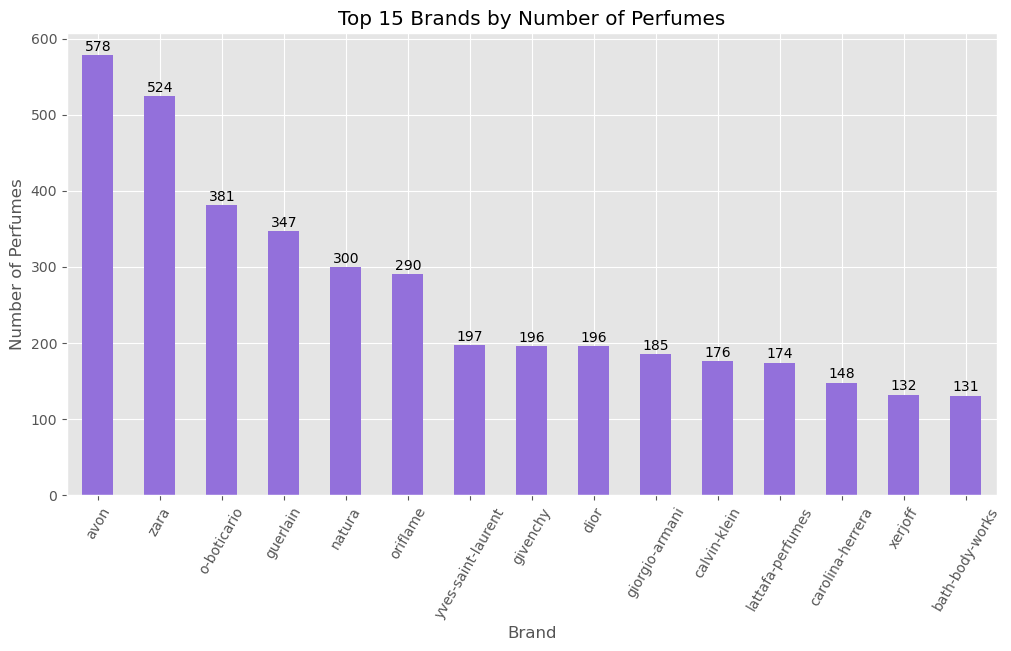

In [22]:
# Graph of Top Brands
plt.figure(figsize=(12, 6))
ax = top_brands.plot(kind="bar", color="#9370DB")
plt.title("Top 15 Brands by Number of Perfumes")
plt.xlabel("Brand")
plt.ylabel("Number of Perfumes")
plt.xticks(rotation=60)

# Label the bars with the number of perfumes
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 1), 
                textcoords="offset points", 
                ha='center', va='bottom',
                color='black')

plt.show()

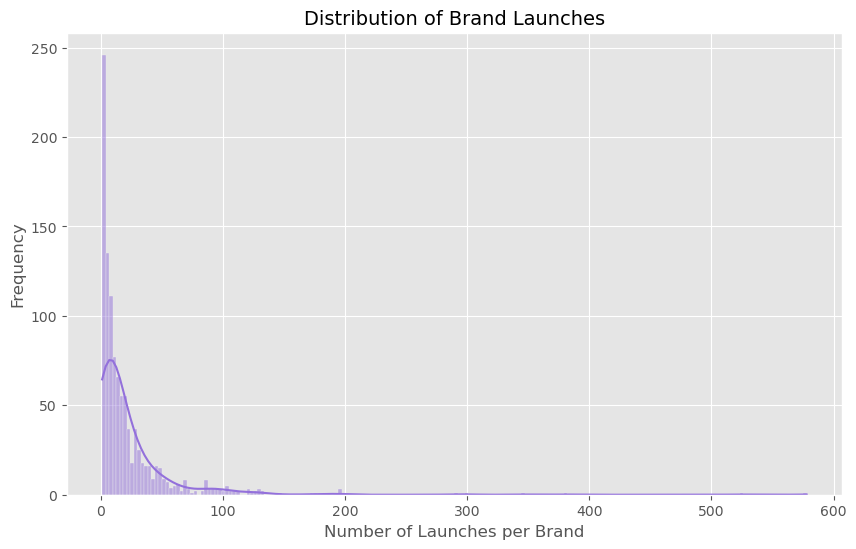

In [23]:
# Dataset for brand counts
brand_counts = fragrance_df["Brand"].value_counts()
brand_counts_df = brand_counts.reset_index()
brand_counts_df.columns = ['Brand', 'Count']

# Distribution of brand launches
plt.figure(figsize=(10, 6))
sns.histplot(brand_counts_df['Count'], bins=200, kde=True, color="#9370DB")
plt.title("Distribution of Brand Launches", fontsize=14)
plt.xlabel("Number of Launches per Brand", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


In [24]:
#Top 10 families by number of perfumes
top_families = fragrance_df["Family"].value_counts().head(10)
#Visualize
print(top_families)

Family
woody           3391
citrus          3320
floral          2602
fruity          2480
white floral    1977
spicy           1946
aromatic        1753
gourmand        1376
ambery          1273
balsamic        1072
Name: count, dtype: int64


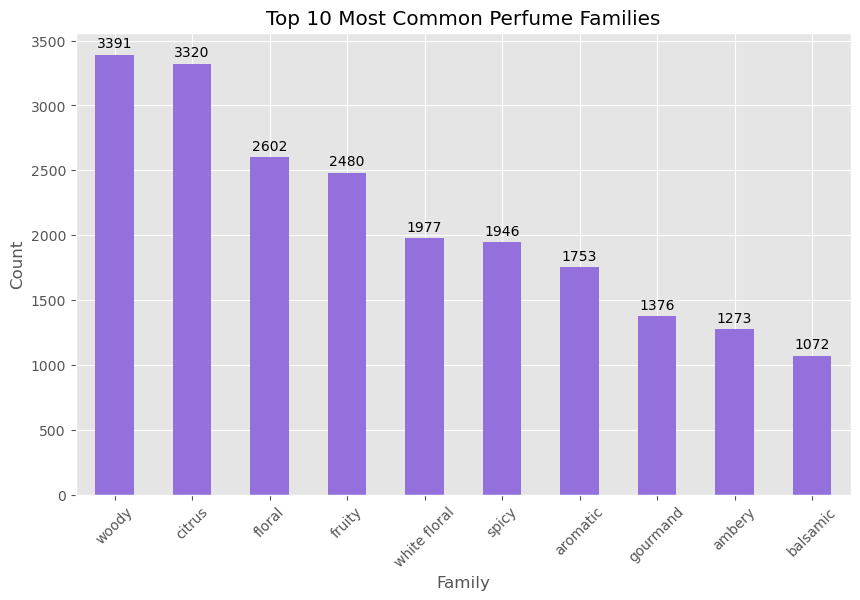

In [25]:
#Graph of Top 10 Families
ax = top_families.plot(kind="bar", color="#9370DB", figsize=(10, 6))
ax.set_title("Top 10 Most Common Perfume Families")
ax.set_xlabel("Family")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
# Label the bars with the number of perfumes
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), 
                textcoords="offset points", 
                ha='center', va='bottom',
                color='black')
                
plt.show()

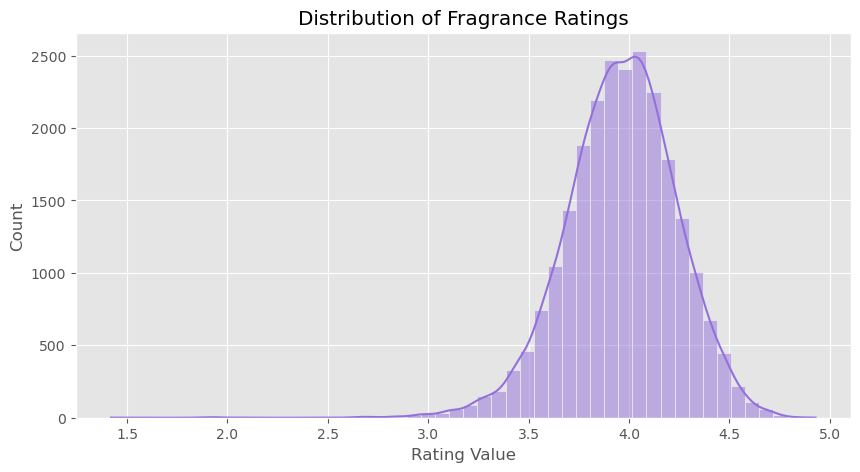

In [26]:
#Distribution of ratings
plt.figure(figsize=(10, 5))
sns.histplot(fragrance_df["Rating Value"], bins=50, kde=True, color="#9370DB")
plt.title("Distribution of Fragrance Ratings")
plt.xlabel("Rating Value")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Rating Count', ylabel='Count'>

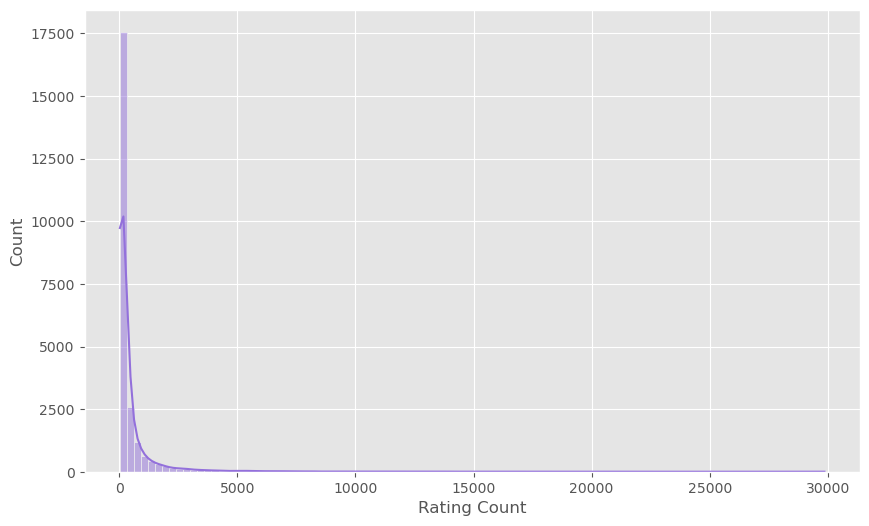

In [27]:
# Distribution of the 'Rating Count' column
plt.figure(figsize=(10, 6))
sns.histplot(fragrance_df['Rating Count'], bins=100, kde=True, color="#9370DB")

In [28]:
# Sort by 'Rating Value' (highest first) and then by 'Rating Count' (highest first)
top_10_ratings = fragrance_df.sort_values(by=['Rating Count','Rating Value'], ascending=[False,False])

# Display the top 10 rows
top_10_ratings.head(10)

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5,Family
12914,https://www.fragrantica.com/perfume/mugler/ali...,alien,mugler,France,women,4.00,29858,2005,jasmine sambac,cashmeran,amber,dominique ropion,laurent bruyere,white floral,amber,floral,unknown,unknown,white floral
1812,https://www.fragrantica.com/perfume/mugler/ang...,angel,mugler,France,women,3.57,29722,1992,"cotton candy, coconut, cassis, melon, jasmine,...","honey, red berries, blackberry, plum, apricot,...","patchouli, chocolate, caramel, vanilla, tonka ...",olivier cresp,yves de chirin,sweet,patchouli,fruity,warm spicy,caramel,gourmand
7457,https://www.fragrantica.com/perfume/dolce-gabb...,light-blue,dolce-gabbana,Italy,women,3.84,29708,2001,"sicilian lemon, apple, cedar, bellflower","bamboo, jasmine, white rose","cedar, musk, amber",olivier cresp,unknown,citrus,woody,fresh,fruity,aromatic,citrus
17145,https://www.fragrantica.com/perfume/chanel/coc...,coco-mademoiselle,chanel,France,women,4.12,29283,2001,"orange, mandarin orange, bergamot, orange blossom","turkish rose, jasmine, mimosa, ylang-ylang","patchouli, white musk, vanilla, vetiver, tonka...",jacques polge,unknown,citrus,woody,patchouli,sweet,white floral,citrus
2746,https://www.fragrantica.com/perfume/lancome/la...,la-vie-est-belle,lancome,France,women,3.64,28982,2012,"black currant, pear","iris, jasmine, orange blossom","praline, vanilla, patchouli, tonka bean",unknown,unknown,sweet,vanilla,fruity,patchouli,woody,gourmand
9859,https://www.fragrantica.com/perfume/tom-ford/b...,black-orchid,tom-ford,USA,women,3.91,26053,2006,"truffle, gardenia, black currant, ylang-ylang,...","orchid, spices, gardenia, fruity notes, ylang-...","mexican chocolate, patchouli, vanille, incense...",david apel,pierre negrin,warm spicy,earthy,woody,sweet,amber,spicy
10579,https://www.fragrantica.com/perfume/yves-saint...,black-opium,yves-saint-laurent,France,women,3.93,25669,2014,"pear, pink pepper, orange blossom","coffee, jasmine, bitter almond, licorice","vanilla, patchouli, cashmere wood, cedar",unknown,unknown,vanilla,coffee,sweet,warm spicy,white floral,balsamic
16127,https://www.fragrantica.com/perfume/dior/hypno...,hypnotic-poison,dior,France,women,4.09,25173,1998,"coconut, plum, apricot","brazilian rosewood, jasmine, caraway, tuberose...","vanilla, almond, sandalwood, musk",annick menardo,christian dussoulier,vanilla,sweet,almond,fruity,nutty,balsamic
5691,https://www.fragrantica.com/perfume/dior/j-ado...,j-adore,dior,France,women,3.78,25013,1999,"pear, melon, magnolia, peach, mandarin orange,...","jasmine, lily-of-the-valley, tuberose, freesia...","musk, vanilla, blackberry, cedar",calice becker,unknown,white floral,floral,fruity,sweet,fresh,white floral
8729,https://www.fragrantica.com/perfume/dior/sauva...,sauvage,dior,France,men,3.88,23727,2015,"calabrian bergamot, pepper","sichuan pepper, lavender, pink pepper, vetiver...","ambroxan, cedar, labdanum",françois demachy,unknown,fresh spicy,amber,citrus,aromatic,musky,spicy


In [29]:
# Sort by 'Rating Value' (highest first) and then by 'Rating Count' (highest first)
top_10_ratings = fragrance_df.sort_values(by=['Rating Value','Rating Count'], ascending=[False,False])

# Display the top 10 rows
top_10_ratings.head(10)

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5,Family
24062,https://www.fragrantica.com/perfume/nilafar-du...,narmar-extrait-de-parfum,nilafar-du-nil,Egypt,men,4.93,30,2022,"cardamom, lavender, juniper, bergamot, clary sage","cashmeran, rose, green tea, lily, cinnamon","cashmeran, tobacco, oakmoss, suede, tonka bean...",unknown,unknown,aromatic,woody,warm spicy,musky,fresh spicy,aromatic
24061,https://www.fragrantica.com/perfume/parfumerie...,aoud-no-1,parfumerie-bruckner,Germany,unisex,4.86,28,2011,"apple, peach, saffron","plum, orange blossom, jasmine","agarwood (oud), sandalwood, vanilla",unknown,unknown,fruity,sweet,oud,woody,powdery,fruity
24060,https://www.fragrantica.com/perfume/darkbeat-p...,khaox,darkbeat-parfums,Spain,unisex,4.85,26,2020,"mint, lime, rum","lily-of-the-valley, fig leaf, cardamom","musk, oakmoss, amber, patchouli",josé m. giraldo,unknown,green,aromatic,citrus,fresh spicy,woody,green
24058,https://www.fragrantica.com/perfume/o-boticari...,floratta,o-boticario,Brazil,women,4.81,31,1992,"ozonic notes, peach","lily-of-the-valley, jasmine","musk, amber",thierry lecoule,unknown,white floral,ozonic,fresh,musky,powdery,white floral
24059,https://www.fragrantica.com/perfume/sultan-pas...,cheval-d-arabie,sultan-pasha-attars,UK,unisex,4.81,26,2020,"taif rose, indian oud, white rose, olibanum, e...","bulgarian rose, indian oud, hay, leather, cive...","white amber, leather, hay, elemi resin, kyara ...",sultan pasha,unknown,rose,amber,fresh spicy,animalic,aromatic,floral
24057,https://www.fragrantica.com/perfume/yves-saint...,art-collection-la-nuit-de-l-homme,yves-saint-laurent,France,men,4.79,29,2014,cardamom,"lavender, cedar, bergamot","vetiver, caraway",unknown,unknown,aromatic,woody,warm spicy,lavender,fresh spicy,aromatic
24055,https://www.fragrantica.com/perfume/karen-low/...,xchange-wonderman,karen-low,France,men,4.77,39,2018,"pear, lavender, mint, bergamot, lemon","cinammon, sage, coriander","black vanilla husk, patchouli, ambergris, whit...",unknown,unknown,vanilla,fruity,sweet,warm spicy,cinnamon,balsamic
24056,https://www.fragrantica.com/perfume/michael-ma...,citizen-jack-parfum,michael-malul-london,USA,men,4.77,30,2022,"melon, bergamot, water lily, mandarin leaf","vanilla, amberwood, clary sage, violet leaf","sandalwood, tonka bean, vetiver, musk",clement gavarry,unknown,woody,vanilla,powdery,aromatic,amber,woody
24054,https://www.fragrantica.com/perfume/o-boticari...,clipping,o-boticario,Brazil,unisex,4.77,26,2002,"ginger, lemon, mint","nutmeg, black pepper","woodsy notes, tobacco, musk",unknown,unknown,fresh spicy,warm spicy,citrus,aromatic,woody,spicy
24051,https://www.fragrantica.com/perfume/afnan/zima...,zimaya-wujood,afnan,UAE,men,4.76,49,0,"vanilla, black pepper, elemi","olibanum, saffron, musk","vanilla, amber",unknown,unknown,vanilla,fresh spicy,amber,warm spicy,powdery,balsamic


## Fragrance Composition
- **Most Common Top, Middle, and Base Notes:** Analyze which notes are most prevalent in each fragrance part.
- **Most Frequent Main Accords:** Discover the primary accords that define the overall scent profiles. //NEEDS TO BE THINKED EXACTLY HOW TO DO THIS

In [30]:
from collections import Counter

In [31]:
# Split and count most common notes in each part of the olfactive pyramid
top_notes = Counter(", ".join(fragrance_df["Top"]).split(", ")).most_common(20)
middle_notes = Counter(", ".join(fragrance_df["Middle"]).split(", ")).most_common(20)
base_notes = Counter(", ".join(fragrance_df["Base"]).split(", ")).most_common(20)

In [32]:
# Create dataframes from the Counter
top_df = pd.DataFrame(top_notes, columns=['Note', 'Count'])
middle_df = pd.DataFrame(middle_notes, columns=['Note', 'Count'])
base_df = pd.DataFrame(base_notes, columns=['Note', 'Count'])

In [33]:
# Function to add text labels on bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', fontsize=10, color='black')

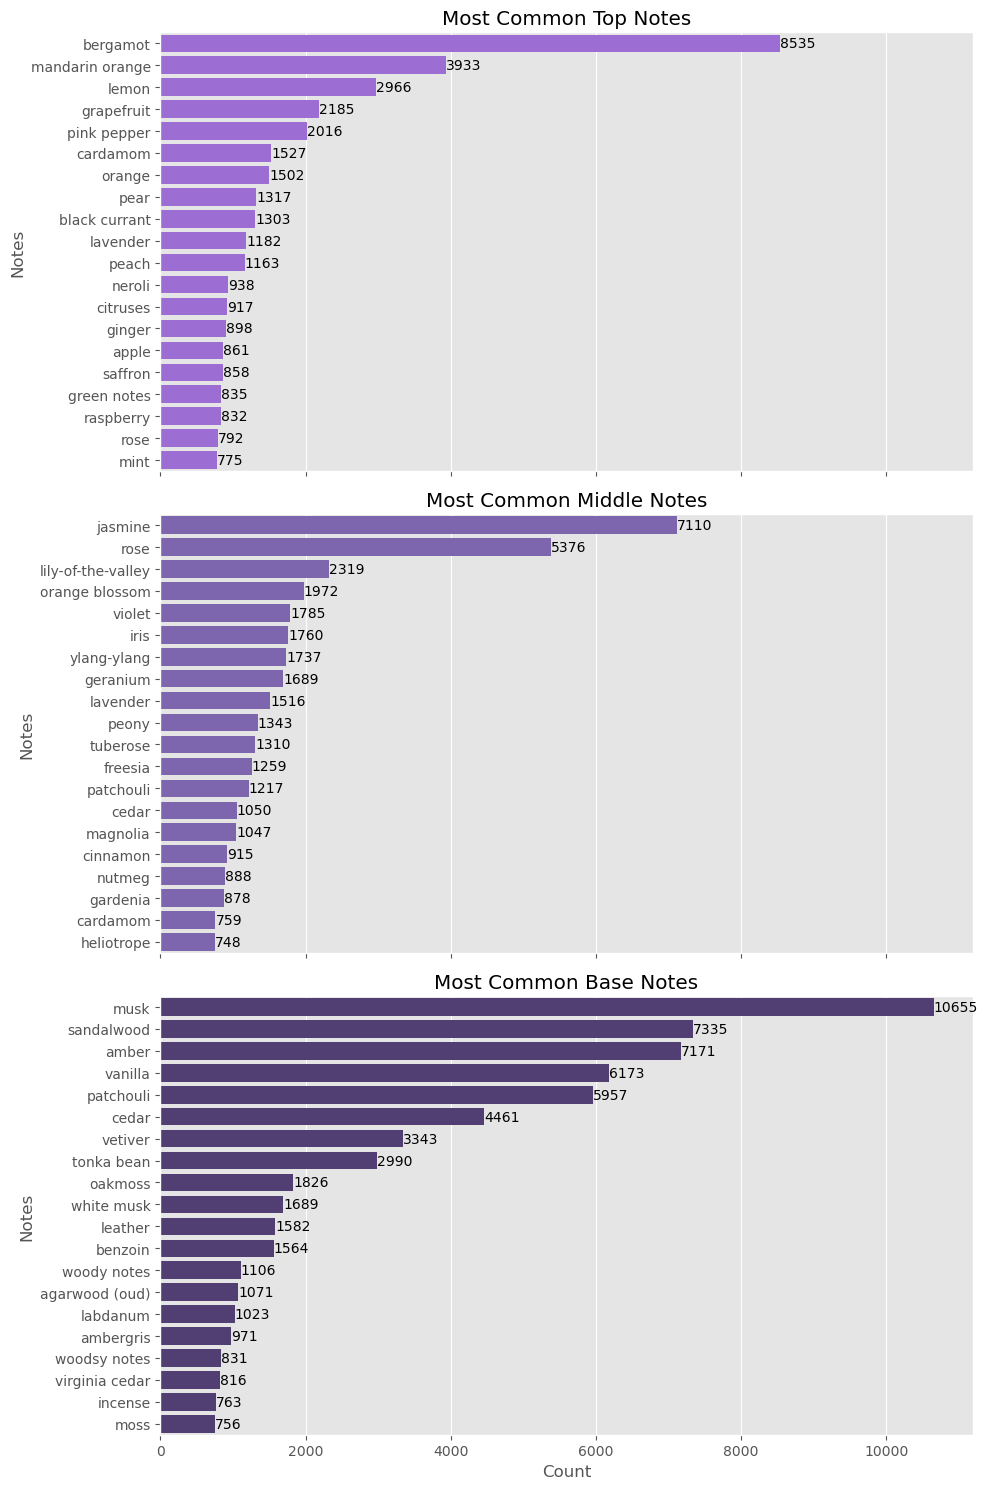

In [34]:
#Graph of the most common notes in each part of the olfactive pyramid
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Gráfico para Top Notes
sns.barplot(y="Note", x="Count", data=top_df, ax=axes[0], hue="Note", legend=False, palette=["#9B5DE5"] * len(top_df))
axes[0].set_title("Most Common Top Notes")
axes[0].set_ylabel("Notes")
axes[0].set_xlabel("Count")
add_labels(axes[0])

# Gráfico para Middle Notes
sns.barplot(y="Note", x="Count", data=middle_df, ax=axes[1], hue="Note", legend=False, palette=["#7A5ABB"] * len(middle_df))
axes[1].set_title("Most Common Middle Notes")
axes[1].set_ylabel("Notes")
axes[1].set_xlabel("Count")
add_labels(axes[1])

# Gráfico para Base Notes
sns.barplot(y="Note", x="Count", data=base_df, ax=axes[2], hue="Note", legend=False, palette=["#4E357B"] * len(base_df))
axes[2].set_title("Most Common Base Notes")
axes[2].set_ylabel("Notes")
axes[2].set_xlabel("Count")
add_labels(axes[2])

plt.tight_layout()
plt.show()

## Temporal Trends
- **Perfumes Released Over the Years:** Examine the number of perfumes introduced each year.
- **Trends in Fragrance Families Over Time:** Investigate how the popularity of various fragrance families has evolved.

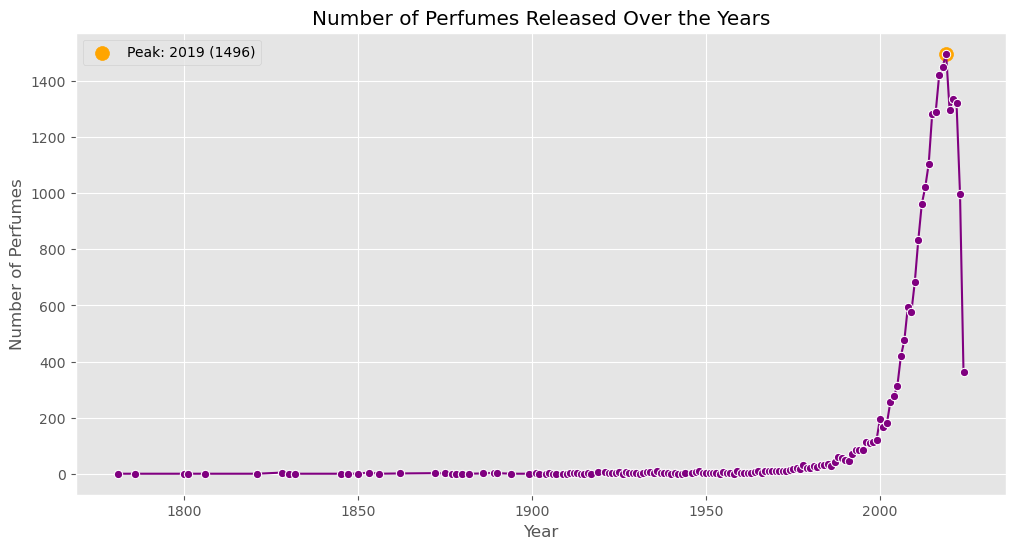

In [35]:
# Evolution of perfume launches over time
evolution_perfumes = fragrance_df["Year"].value_counts().sort_index()
evolution_perfumes = evolution_perfumes[evolution_perfumes.index > 1750]  

# Year with more launches
max_year = evolution_perfumes.idxmax()  
max_value = evolution_perfumes.max()    

# Plot Perfume launches over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=evolution_perfumes.index, y=evolution_perfumes.values, color="purple", marker="o")

# Show peak year
plt.scatter(max_year, max_value, color="orange", s=100, label=f"Peak: {max_year} ({max_value})")


# Labels
plt.title("Number of Perfumes Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Perfumes")
plt.grid(True)
plt.legend()
plt.show()


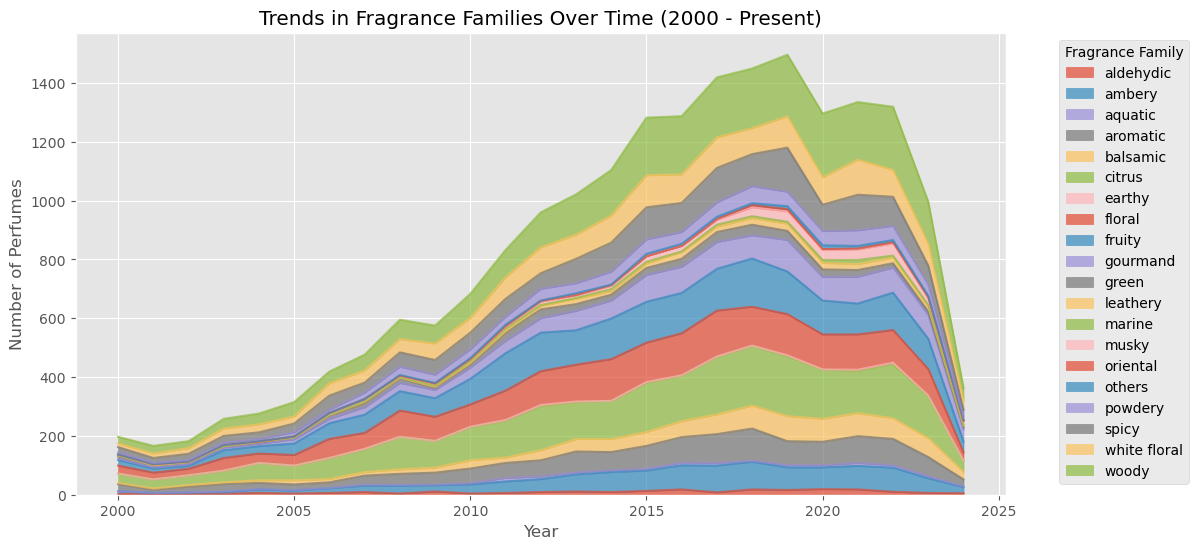

In [36]:
# Aggregate the count of perfumes per fragrance family per year
family_trends = fragrance_df.groupby(["Year", "Family"]).size().reset_index(name="Count")

# Filter the dataset to include only years from 2000 onwards
filtered_family_trends = family_trends[family_trends["Year"] >= 2000]

# Pivot the data again after filtering
filtered_family_trends_pivot = filtered_family_trends.pivot(index="Year", columns="Family", values="Count")

# Plot the trends using a stacked area chart
fig, ax = plt.subplots(figsize=(12, 6))
filtered_family_trends_pivot.plot(kind="area", stacked=True, alpha=0.7, ax=ax)
ax.set_title("Trends in Fragrance Families Over Time (2000 - Present)")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Perfumes")
ax.legend(title="Fragrance Family", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Gender-Based Analysis
- **Differences in Fragrance Composition by Gender:** Compare the composition of fragrances preferred by different genders.
- **Rating Distribution by Gender:** Analyze how perfume ratings differ between genders.

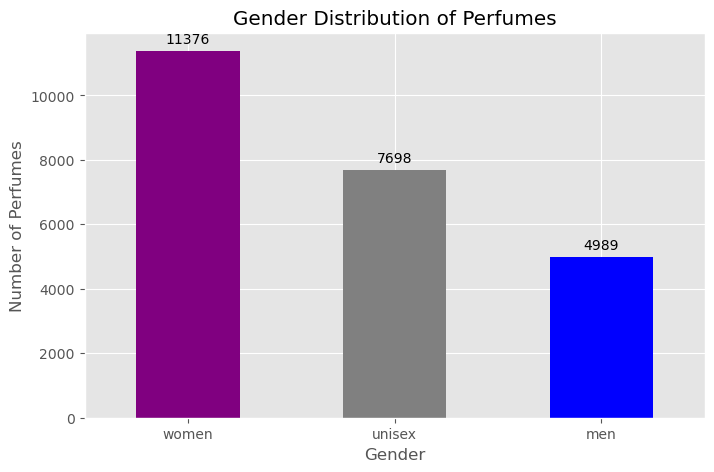

In [37]:
# Gender-Based Fragrance Trends
gender_distribution = fragrance_df["Gender"].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
ax = gender_distribution.plot(kind="bar", color=["purple", "grey", "blue"])
plt.title("Gender Distribution of Perfumes")
plt.xlabel("Gender")
plt.ylabel("Number of Perfumes")
plt.xticks(rotation=0)

# Label the bars with the number of perfumes
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3), 
                textcoords="offset points", 
                ha='center', va='bottom',
                color='black')

# Mostrar gráfico
plt.show()


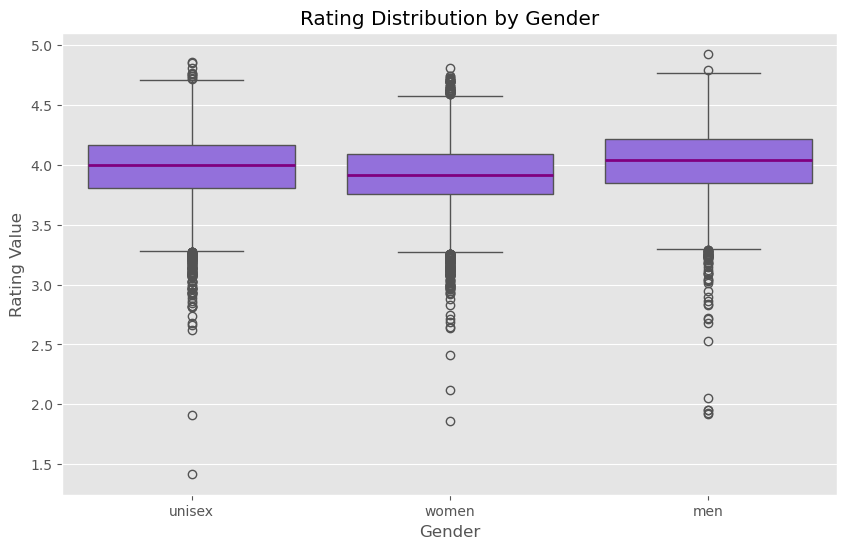

In [38]:
# Create boxplot for rating distribution by gender
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=fragrance_df["Gender"], y=fragrance_df["Rating Value"], ax=ax, showfliers=True, 
            boxprops=dict(facecolor="#9370DB"), medianprops=dict(color="purple", linewidth=2))

ax.set_title("Rating Distribution by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Rating Value")

plt.show()

### **5. Preparing dataset for Machine Learning model**

We eliminate older references to focus on "Modern Perfumery" and too high to low ratings values to ensure more reliable recommendations

In [39]:
#Eliminate columns that are not necessary
columns_to_be_dropped = ["url","Perfumer2"]
fragrance_df = fragrance_df.drop(columns=columns_to_be_dropped)

In [40]:
#Eliminate from the dataset fragrances older than 1990
modern_fragrance_df = fragrance_df[fragrance_df["Year"] >= 1990].reset_index(drop=True)

# Mostrar información actualizada
modern_fragrance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21187 entries, 0 to 21186
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Perfume       21187 non-null  object 
 1   Brand         21187 non-null  object 
 2   Country       21187 non-null  object 
 3   Gender        21187 non-null  object 
 4   Rating Value  21187 non-null  float64
 5   Rating Count  21187 non-null  int64  
 6   Year          21187 non-null  int32  
 7   Top           21187 non-null  object 
 8   Middle        21187 non-null  object 
 9   Base          21187 non-null  object 
 10  Perfumer1     21187 non-null  object 
 11  mainaccord1   21187 non-null  object 
 12  mainaccord2   21187 non-null  object 
 13  mainaccord3   21187 non-null  object 
 14  mainaccord4   21187 non-null  object 
 15  mainaccord5   21187 non-null  object 
 16  Family        21187 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(14)
memory usage: 2.7+ MB


In [41]:
# Identify outliers in the "Rating Value" column 
Q1 = modern_fragrance_df["Rating Value"].quantile(0.25)
Q3 = modern_fragrance_df["Rating Value"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = modern_fragrance_df[(modern_fragrance_df["Rating Value"] >= lower_bound) & (modern_fragrance_df["Rating Value"] <= upper_bound)].reset_index(drop=True)


# Show summary of changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20918 entries, 0 to 20917
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Perfume       20918 non-null  object 
 1   Brand         20918 non-null  object 
 2   Country       20918 non-null  object 
 3   Gender        20918 non-null  object 
 4   Rating Value  20918 non-null  float64
 5   Rating Count  20918 non-null  int64  
 6   Year          20918 non-null  int32  
 7   Top           20918 non-null  object 
 8   Middle        20918 non-null  object 
 9   Base          20918 non-null  object 
 10  Perfumer1     20918 non-null  object 
 11  mainaccord1   20918 non-null  object 
 12  mainaccord2   20918 non-null  object 
 13  mainaccord3   20918 non-null  object 
 14  mainaccord4   20918 non-null  object 
 15  mainaccord5   20918 non-null  object 
 16  Family        20918 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(14)
memory usage: 2.6+ MB


In [42]:
import re

# Function to clean and prepare fragrance notes for TF-IDF while keeping commas
def prepare_for_tfidf(text):
    if pd.isna(text):
        return ""
    
    # Remove special characters (™, ®, etc.) but KEEP commas
    text = re.sub(r"[^\w\s\-,]", "", text)  
    
    # Convert to lowercase for consistency
    text = text.lower()

    # Replace hyphens with spaces for better n-gram recognition
    text = text.replace("-", " ")

    return text.strip()

# Apply the function ONLY to object (string) columns
for column in df.select_dtypes(include=["object"]).columns:
    df[column] = df[column].apply(prepare_for_tfidf)

# Show the updated DataFrame
df.head()


,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5,Family
0,full speed power,avon,usa,men,3.24,33,2014,lemon,rosemary,cedar,unknown,aromatic,woody,citrus,fresh spicy,unknown,aromatic
1,summer white bright,avon,usa,women,3.24,141,2015,lemon,lily of the valley,tagetes,unknown,white floral,citrus,aromatic,fresh,balsamic,white floral
2,outrageous limited edition 2017,frederic malle,france,unisex,3.24,63,2017,"green apple, grapefruit, lime, cinnamon, mint","neroli, orange blossom","aldehydes, musk, ambroxan, cedar",sophia grojsman,citrus,musky,fresh,white floral,aldehydic,citrus
3,bleu abysse,les parfums de rosine,france,unisex,3.24,42,2019,"elemi, bergamot, cassis","mineral notes, rose","algae, vetiver, patchouli, agarwood oud, incense",serge de oliveira,aromatic,mineral,rose,woody,citrus,aromatic
4,amo ferragamo oriental wood,salvatore ferragamo,italy,women,3.24,50,2023,"guatemalan cardamom, apple, lemon","rose, saffron, jasmine","resins, musk, vanilla",unknown,warm spicy,rose,amber,musky,vanilla,spicy


In [43]:
#Create a combined text column with all the olfactive comments
text_columns = ["Top", "Middle", "Base", "mainaccord1", "mainaccord2", "mainaccord3", "mainaccord4", "mainaccord5", "Family"]
df["Olfactive Profile"] = df[text_columns].apply(lambda x: ', '.join(x), axis=1)

In [44]:
df

,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5,Family,Olfactive Profile
0,full speed power,avon,usa,men,3.24,33,2014,lemon,rosemary,cedar,unknown,aromatic,woody,citrus,fresh spicy,unknown,aromatic,"lemon, rosemary, cedar, aromatic, woody, citru..."
1,summer white bright,avon,usa,women,3.24,141,2015,lemon,lily of the valley,tagetes,unknown,white floral,citrus,aromatic,fresh,balsamic,white floral,"lemon, lily of the valley, tagetes, white flor..."
2,outrageous limited edition 2017,frederic malle,france,unisex,3.24,63,2017,"green apple, grapefruit, lime, cinnamon, mint","neroli, orange blossom","aldehydes, musk, ambroxan, cedar",sophia grojsman,citrus,musky,fresh,white floral,aldehydic,citrus,"green apple, grapefruit, lime, cinnamon, mint,..."
3,bleu abysse,les parfums de rosine,france,unisex,3.24,42,2019,"elemi, bergamot, cassis","mineral notes, rose","algae, vetiver, patchouli, agarwood oud, incense",serge de oliveira,aromatic,mineral,rose,woody,citrus,aromatic,"elemi, bergamot, cassis, mineral notes, rose, ..."
4,amo ferragamo oriental wood,salvatore ferragamo,italy,women,3.24,50,2023,"guatemalan cardamom, apple, lemon","rose, saffron, jasmine","resins, musk, vanilla",unknown,warm spicy,rose,amber,musky,vanilla,spicy,"guatemalan cardamom, apple, lemon, rose, saffr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20913,addicted,aaron terence hughes,uk,unisex,4.68,47,2024,cognac,"apple, honey, cinnamon","chocolate, tonka bean, vanilla, sandalwood",unknown,warm spicy,sweet,chocolate,woody,honey,spicy,"cognac, apple, honey, cinnamon, chocolate, ton..."
20914,diwan,arabian oud,arabia saudi,unisex,4.68,75,2020,"bergamot, nutmeg, cardamom, apple","cashmere wood, ambergris","musk, patchouli, vanilla",unknown,musky,fresh spicy,woody,amber,warm spicy,musky,"bergamot, nutmeg, cardamom, apple, cashmere wo..."
20915,la melodie,claude marsal parfums,usa,men,4.68,63,2016,"sea notes, mandarin orange, grapefruit","jasmine, bay leaf","whiskey, patchouli, guaiac wood, oakmoss, ambe...",unknown,woody,whiskey,warm spicy,marine,patchouli,woody,"sea notes, mandarin orange, grapefruit, jasmin..."
20916,mystery for him,mith,thailand,unisex,4.68,69,2023,"lemon, pink pepper","juniper berries, jasmine","vanilla, oakmoss, amber, patchouli",jean christophe hérault,citrus,aromatic,vanilla,woody,soft spicy,citrus,"lemon, pink pepper, juniper berries, jasmine, ..."


### 5.2 Saving data

In [45]:
# Save in UTF-8
df.to_csv("../data/fragrance_ML_model.csv", index=False)


### **6. Extra**

Extracting all ingredients into a database would enable further development by linking each ingredient's olfactory properties to neuroscientific insights, allowing for the analysis of their impact on mood, cognition, and physiological responses."

In [46]:
# Function to divide values using ","
def split_and_clean(text):
    if pd.isna(text):
        return []
    return [word.strip() for word in text.split(",")]

# Apply to olfactive pyramid columns
all_words = set()
for column in ["Top", "Middle", "Base",]:
    df[column] = df[column].astype(str)
    all_words.update(df[column].apply(lambda x: split_and_clean(x)).explode())

# Create a dataframe with all the unique words
all_ing_df = pd.DataFrame({"Ingredients": list(all_words)})

# Order alphabetically
all_ing_df = all_ing_df.sort_values(by="Ingredients").reset_index(drop=True)

#Visualize all the ingredients
all_ing_df

,Ingredients
0,absinthe
1,acai berry
2,accord eudora
3,acerola
4,acerola blossom
...,...
1640,yohimbe
1641,yuzu
1642,yuzu flower
1643,zefir
